# **SVM - Kernel comparison**

## Kernel interpretation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles

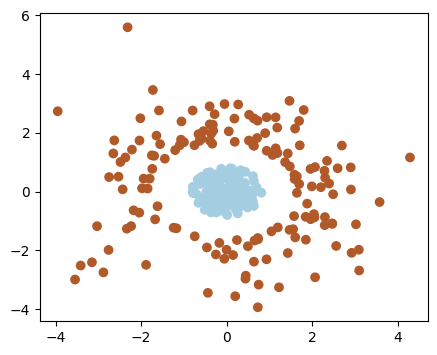

In [ ]:
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples = 300 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)

X[y == 0, :] = X[y ==0, :] * 0.5

_, ax = plt.subplots(figsize = (5,4))
plt.scatter( X[:, 0] , X[:, 1] , c = y, cmap='Paired')

In [ ]:
k = X[:, 0] * 2 + X[:, 1] * 2 #X[:, 0] ** 2 + X[:, 1] ** 2
X = np.c_[X, k]
print(X.shape)

(300, 3)


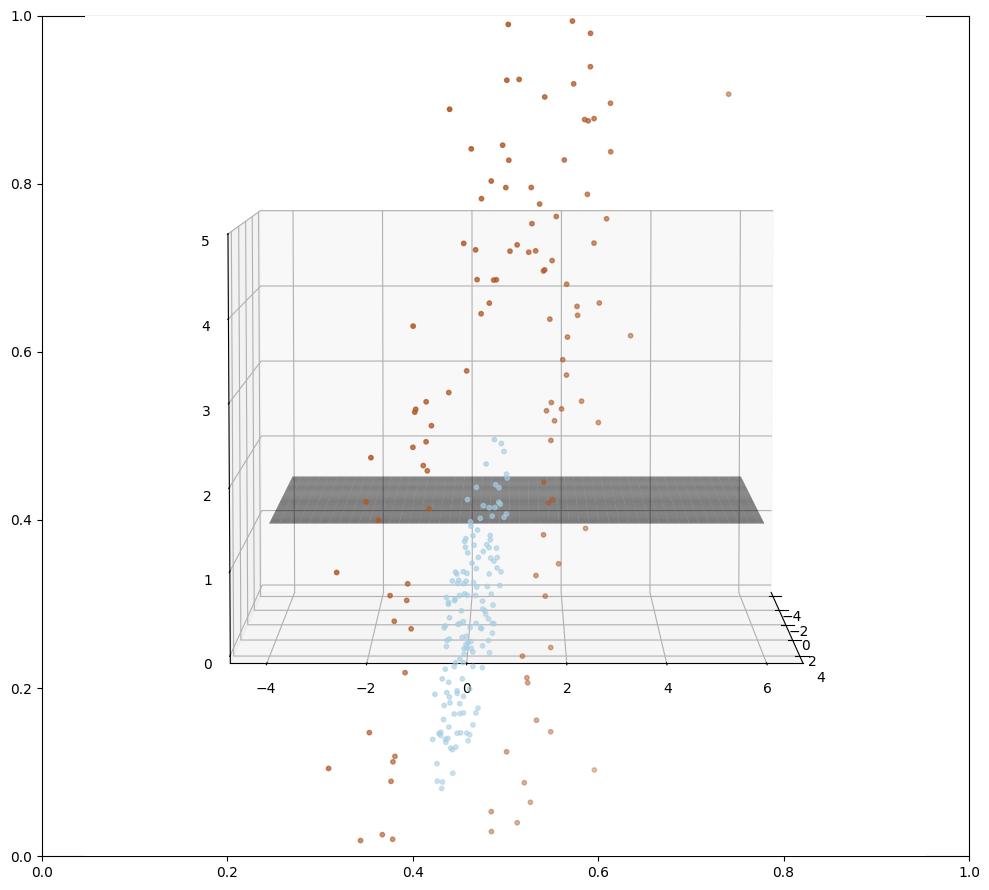

In [ ]:
# Projection in 3D
f, _ = plt.subplots(figsize = (10,9))
ax = f.add_subplot(projection="3d")

#Graphics initials
ax.view_init(5, 0)
ax.scatter3D( X[:, 0] , X[:, 1] , k , c = y , s=10, cmap='Paired')

h_grid, v_grid = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 6, 100))
z_grid = np.ones(h_grid.shape) * 1.5
ax.plot_surface(h_grid, v_grid, z_grid, color='k', alpha=0.5)

ax.set_zlim(-0.1, 5)
plt.tight_layout()

In [ ]:
import os

os.makedirs('images', exist_ok = True)

In [ ]:
# Sve all figs

for i in range(0, 9, 10):
  f, _ = plt.subplots(figsize = (5,4))
  ax = f.add_subplot(projection="3d")

  ax.view_init(i, 45)
  ax.scatter3D( X[:, 0] , X[:, 1] , k , c = y, cmap='Paired')

  ax.plot_surface(h_grid, v_grid, z_grid, color='k', alpha=0.5)

  ax.set_zlim(-0.1, 7)
  plt.tight_layout()
  plt.savefig('images/{0}.png'.format(i))
  #

In [ ]:
all_images = []
#print(os.listdir('images/'))
#print(sorted(os.listdir('images/')))


In [ ]:
import os
from PIL import Image

# Save a gif

for file_ in sorted(os.listdir("images/")):
  image = Image.open('images/{0}'.format(file_))
  all_images.append(image)

image.save("kernel_.gif", save_all=True, append_images=all_images, duration=200, loop=0)

## SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [ ]:
# we create 100 separable points
X, Y = make_classification(n_samples = _ , n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, random_state=2)
plt.scatter( _ , _ , c = _ , s = _, cmap=plt.cm.Paired)

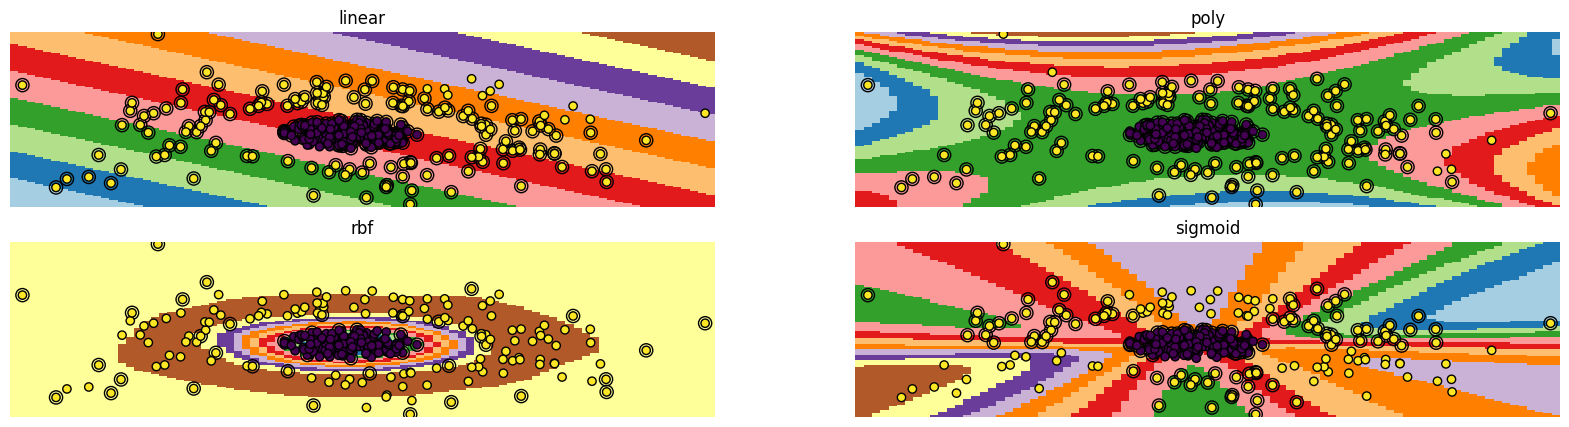

In [26]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

_, axes = plt.subplots(2,2, figsize = (20,5))

# fit the model
for i, kernel in enumerate(kernels) :
    clf = SVC(kernel = kernel , gamma = 1)
    clf.fit( X , y )

    h_min, h_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    v_min, v_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

    h_grid, v_grid = np.meshgrid(np.arange( h_min, h_max, 0.1), np.arange( v_min, v_max, 0.1))
    pred_grid = clf.decision_function(np.c_[h_grid.ravel(), v_grid.ravel()])

    pred_grid = pred_grid.reshape( h_grid.shape )
    axes=axes.flatten()
    axes[i].set_title(kernel)
    axes[i].pcolormesh( h_grid , v_grid , pred_grid, cmap ='Paired')
    # axes[i].contour( _ , _ , pred_grid, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter( X[:, 0] , X[:, 1] , c = y , edgecolors='k')
    axes[i].set_axis_off()


plt.show()

In [ ]:

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (20,5))

# fit the model
for i, kernel in enumerate(kernels):
    #
    clf = svm.SVC(kernel = _ , gamma = 1)
    clf.fit( _ , _ )

    x_min, x_max = _ , _
    y_min, y_max = _ , _

    x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    predictions = clf.decision_function(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape(x_dim.shape)
    axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.coolwarm)
    axes[i].contourf( _ , _ , predictions, alpha = 0.75, cmap = plt.cm.coolwarm)

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter( _ , _ , c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_axis_off()

plt.show()

Create a function that plots the decision boundaries of a given SVM

## In real data

Evaluate the different SVM kernels in the Iris and Fruits datasets